# 1.

In [1]:
import datetime
import itertools
import json
import time

import matplotlib.pyplot as plt
import numpy as np
import pyproj
import requests
from PIL import Image
from skyfield.api import wgs84

from IOHandler import *
%matplotlib widget

In [7]:
startCoordinate = np.array([  # the bottom left corner of the numpy array in EPSG:5179
    1818300.386440567,
    987348.4169762174
])
endCoordinate = np.array([  # the top right corner of the numpy array in EPSG:5179
    1819973.889097789,
    988119.5412749264
])


In [10]:
numpy_array.shape

(1674, 771)

In [8]:
numpy_array = np.load('LX_test.npy')
handler = IOHandler(
    numpy_array.astype(np.bool_).astype(np.float32),
    startCoordinate,
    endCoordinate,
)
print(f'{handler.y_resolution:.2f}, {handler.x_resolution:.2f}')


1.00, 1.00


In [ ]:
N = 1000000
shift = 50
xq = handler.x_coordinates[np.random.randint(
    shift, numpy_array.shape[0]-shift, N)] + np.random.rand(N) * 5
yq = handler.y_coordinates[np.random.randint(
    shift, numpy_array.shape[1]-shift, N)] + np.random.rand(N) * 5

startTime = time.time()
for x, y in zip(xq, yq):
    handler.searchValid(x, y)
endTime = time.time()
print(f'per sampling costs {(endTime-startTime)*1000/N:.5f} ms')


> note:numpy is slower by 1.5-10 times \
> improve?

In [ ]:

# numpy query version 
startTime = time.time()
# given a list of query points, return the valid points using numpy
handler.searchValidNumpy(yq, xq)
endTime = time.time()
print(f'per sampling costs {(endTime-startTime)*1000/N:.5f} ms')


In [ ]:
exit()


---

In [13]:
source_proj = pyproj.Proj(init='epsg:5179')
target_proj = pyproj.Proj(init='epsg:4326')
transform = pyproj.Transformer.from_proj(source_proj, target_proj)

lats = handler.y_coordinates
lons = handler.x_coordinates

# for lat, lon in zip (lats, lons):
#     lat, lon = transform.transform(lat, lon)

# modify the lats and lons with the transform
for i in range(len(lats)):
    lats[i], lons[i] = transform.transform(lats[i], lons[i])


/opt/anaconda3/envs/spectrums/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/spectrums/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
# def elevation_function(x):
#    url = 'https://api.open-elevation.com/api/v1/lookup?'
#    params = {'locations': f"{x[0]},{x[1]}"}
#    result = requests.get(url, params=params)
#    return result.json()['results'][0]['elevation']


combinations = list(itertools.product(lons, lats))
# convert to numpy array
combinations = np.array(combinations)
print(combinations.shape)
height = np.zeros_like(numpy_array, dtype=np.float32)

# generate the height map
for i in range(height.shape[0]):
      for j in range(height.shape[1]):
         height[i, j] = wgs84.latlon(combinations[i*height.shape[1]+j][1], -combinations[i*height.shape[1]+j][0]).elevation.m


(1290654, 2)


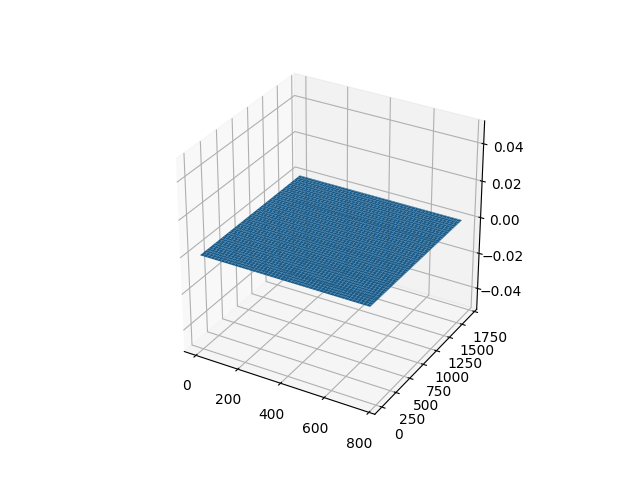

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming Z is your 2-D numpy array
Z = height

# Create x and y coordinates
x = np.arange(Z.shape[1])
y = np.arange(Z.shape[0])
X, Y = np.meshgrid(x, y)

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# set the same scale for 3 axis
ax.set_aspect('equal', adjustable='box')

# Plot the surface
ax.plot_surface(X, Y, Z)

plt.show()

In [11]:
from skyfield.api import wgs84
observatory = wgs84.latlon(37.3414, -121.6429)  

In [12]:
observatory.elevation.m

0.0